# Feature Scaling & Learing Rate

## 1. Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("houses.txt", header=None, 
                   names=['Size(sqft)', 'Number of Bedrooms', 
                          'Number of floors', 'Age of Home', 
                          'Price (1000s dollars)'])

df = pd.DataFrame(data)

df

,Size(sqft),Number of Bedrooms,Number of floors,Age of Home,Price (1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [2]:
X_train = df[['Size(sqft)', 'Number of Bedrooms', 
              'Number of floors', 'Age of Home']]
X_train = X_train.rename(columns={
                                  'Number of Bedrooms': 'Bedrooms', 
                                  'Number of floors': 'Floors', 
                                  'Age of Home': 'Age'
                                 })

print(X_train)

    Size(sqft)  Bedrooms  Floors   Age
0        952.0       2.0     1.0  65.0
1       1244.0       3.0     1.0  64.0
2       1947.0       3.0     2.0  17.0
3       1725.0       3.0     2.0  42.0
4       1959.0       3.0     2.0  15.0
..         ...       ...     ...   ...
95      1224.0       2.0     2.0  12.0
96      1432.0       2.0     1.0  43.0
97      1660.0       3.0     2.0  19.0
98      1212.0       3.0     1.0  20.0
99      1050.0       2.0     1.0  65.0

[100 rows x 4 columns]


In [3]:
y_train = df['Price (1000s dollars)']

y_train = y_train.rename('Price')

print(y_train)

0     271.5
1     300.0
2     509.8
3     394.0
4     540.0
      ...  
95    329.0
96    388.0
97    390.0
98    356.0
99    257.8
Name: Price, Length: 100, dtype: float64


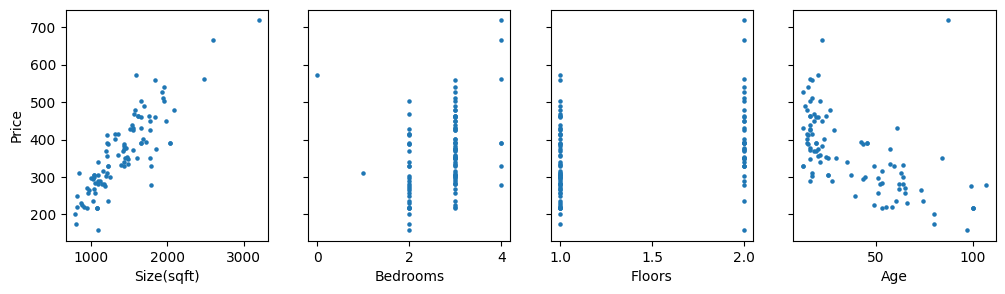

In [4]:
fig, ax = plt.subplots(1, 4, figsize = (12,3), sharey = True)

for i in range(4):
    ax[i].scatter(X_train.iloc[:,i], y_train, s = 5)
    ax[i].set_xlabel(X_train.columns[i])
ax[0].set_ylabel(y_train.name)
plt.show()    

## 2. Gradient descent algorithm

Here are the equations you developed in the last lab on gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [5]:
def Prediction(x, w, b):
    
    y = np.dot(x, w) + b
    
    return y

def Cost(x, y, w, b):
    
    m = x.shape[0]
    
    y_hat = Prediction(x, w, b)
    
    error = y_hat - y
    
    J_w_b = np.sum(error**2) / (2*m)
    
    return J_w_b

def Gradient_computing(x, y, w, b):
    
    m = x.shape[0]
    
    x_T = np.transpose(x)
    
    y_hat = Prediction(x, w, b)
    
    error = y_hat - y
    
    dj_dw = np.dot(x_T, error) / m
    
    dj_db = np.sum(error) / m
    
    return dj_dw, dj_db

def print_outcome(i, w, b, J_w_b):
    
    print("Itertaion =", i)
    
    print("w =", '[' + ', '.join(['{:.1e}'.format(num) for num in w]) + ']')
    
    print(f"b = {b:0.1e}") 
    
    print(f"J_w_b = {J_w_b:0.5e}")
    
    print("") 
    

def Gradient_descent(x, y, alpha, iterations):
    
    n = x.shape[1]
    
    w = np.zeros(n)
    
    b = 0
    
    hist = np.zeros(iterations)
    
    for i in range(iterations):
        
        dj_dw, dj_db = Gradient_computing(x, y, w, b)
        
        w = w - alpha * dj_dw
        
        b = b - alpha * dj_db
        
        J_w_b = Cost(x, y, w, b)
        
        hist[i] = J_w_b
        
        if iterations <= 10:
            
            print_outcome(i, w, b, J_w_b)
        
        if 10 < iterations <= 100:
        
            if i % 10 == 0:
        
                print_outcome(i, w, b, J_w_b)
            
        if 100 < iterations <= 1000:
            
            if i % 100 == 0:
        
                print_outcome(i, w, b, J_w_b) 
        
    if iterations != 10:
    
        print_outcome(i, w, b, J_w_b)
    
    return w, b, J_w_b, hist

## 3. Learning Rate

<div style="text-align:center">
    <img src="b_3_alpha.png" alt="Image" width="500"/>
</div>

<div style="text-align:center">
    <img src="b_3_alpha2.png" alt="Image" width="500"/>
</div>

In [6]:
def plot_cost_iter(hist):
    
    plt.plot(hist)
    
    plt.xlabel("Iteration")
    
    plt.ylabel("Cost")
    
    plt.title("Iteration")
    
    plt.show()

#### $\alpha$ = 9.9e-7

In [7]:
alpha = 9.9e-7

w, b, J_w_b, hist = Gradient_descent(X_train, y_train, alpha, iterations = 10)

Itertaion = 0
w = [5.4e-01, 9.9e-04, 5.1e-04, 1.2e-02]
b = 3.6e-04
J_w_b = 9.31055e+04

Itertaion = 1
w = [-8.0e-02, -1.6e-04, -9.3e-05, -3.2e-03]
b = -4.4e-05
J_w_b = 1.22207e+05

Itertaion = 2
w = [6.4e-01, 1.1e-03, 5.8e-04, 1.3e-02]
b = 4.3e-04
J_w_b = 1.60562e+05

Itertaion = 3
w = [-1.9e-01, -3.7e-04, -2.1e-04, -7.0e-03]
b = -1.0e-04
J_w_b = 2.11110e+05

Itertaion = 4
w = [7.6e-01, 1.4e-03, 6.8e-04, 1.5e-02]
b = 5.2e-04
J_w_b = 2.77730e+05

Itertaion = 5
w = [-3.3e-01, -6.4e-04, -3.6e-04, -1.2e-02]
b = -1.9e-04
J_w_b = 3.65531e+05

Itertaion = 6
w = [9.2e-01, 1.6e-03, 8.2e-04, 1.7e-02]
b = 6.3e-04
J_w_b = 4.81246e+05

Itertaion = 7
w = [-5.1e-01, -9.9e-04, -5.5e-04, -1.7e-02]
b = -3.0e-04
J_w_b = 6.33750e+05

Itertaion = 8
w = [1.1e+00, 2.0e-03, 1.0e-03, 2.1e-02]
b = 7.8e-04
J_w_b = 8.34741e+05

Itertaion = 9
w = [-7.5e-01, -1.4e-03, -8.0e-04, -2.4e-02]
b = -4.5e-04
J_w_b = 1.09963e+06



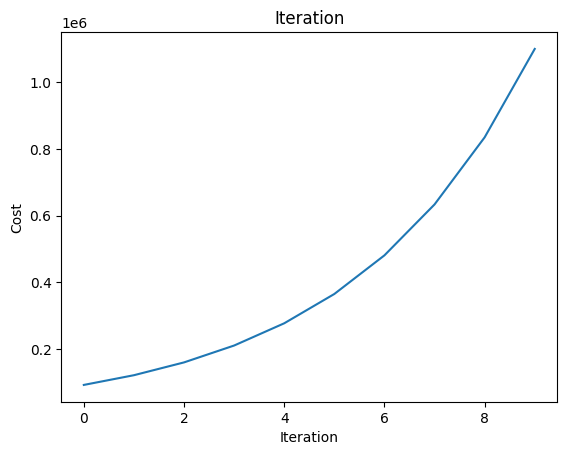

In [8]:
plot_cost_iter(hist)

#### $\alpha$ = 9e-7

In [9]:
alpha = 9e-7

w, b, J_w_b, hist = Gradient_descent(X_train, y_train, alpha, iterations = 10)

Itertaion = 0
w = [4.9e-01, 9.0e-04, 4.6e-04, 1.1e-02]
b = 3.3e-04
J_w_b = 6.46137e+04

Itertaion = 1
w = [2.3e-02, 3.1e-05, 7.5e-06, -6.2e-04]
b = 2.3e-05
J_w_b = 5.87949e+04

Itertaion = 2
w = [4.7e-01, 8.5e-04, 4.3e-04, 9.5e-03]
b = 3.2e-04
J_w_b = 5.35131e+04

Itertaion = 3
w = [4.5e-02, 5.9e-05, 1.3e-05, -1.3e-03]
b = 4.5e-05
J_w_b = 4.87187e+04

Itertaion = 4
w = [4.5e-01, 8.0e-04, 3.9e-04, 7.9e-03]
b = 3.1e-04
J_w_b = 4.43668e+04

Itertaion = 5
w = [6.4e-02, 8.2e-05, 1.7e-05, -2.0e-03]
b = 6.5e-05
J_w_b = 4.04165e+04

Itertaion = 6
w = [4.3e-01, 7.5e-04, 3.6e-04, 6.2e-03]
b = 3.1e-04
J_w_b = 3.68307e+04

Itertaion = 7
w = [8.1e-02, 1.0e-04, 1.9e-05, -2.7e-03]
b = 8.5e-05
J_w_b = 3.35758e+04

Itertaion = 8
w = [4.2e-01, 7.1e-04, 3.3e-04, 4.7e-03]
b = 3.1e-04
J_w_b = 3.06213e+04

Itertaion = 9
w = [9.7e-02, 1.2e-04, 1.9e-05, -3.5e-03]
b = 1.0e-04
J_w_b = 2.79394e+04



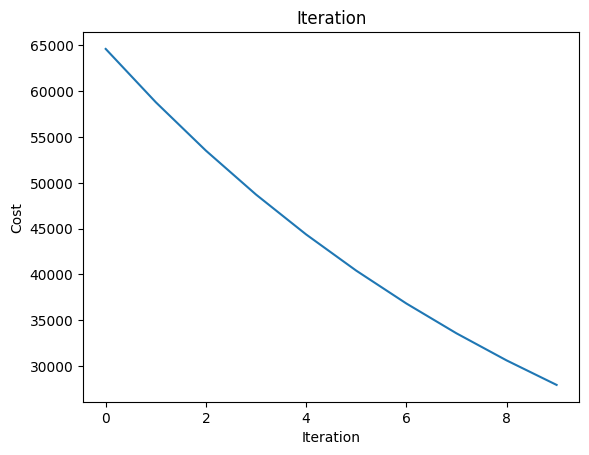

In [10]:
plot_cost_iter(hist)

### $\alpha$ = 1e-7

In [11]:
alpha = 1e-7

w, b, J_w_b, hist = Gradient_descent(X_train, y_train, alpha, iterations = 10)

Itertaion = 0
w = [5.5e-02, 1.0e-04, 5.2e-05, 1.2e-03]
b = 3.6e-05
J_w_b = 4.41544e+04

Itertaion = 1
w = [9.8e-02, 1.8e-04, 9.2e-05, 2.2e-03]
b = 6.5e-05
J_w_b = 2.76797e+04

Itertaion = 2
w = [1.3e-01, 2.4e-04, 1.2e-04, 2.9e-03]
b = 8.7e-05
J_w_b = 1.75784e+04

Itertaion = 3
w = [1.6e-01, 2.9e-04, 1.5e-04, 3.5e-03]
b = 1.0e-04
J_w_b = 1.13850e+04

Itertaion = 4
w = [1.8e-01, 3.2e-04, 1.7e-04, 3.9e-03]
b = 1.2e-04
J_w_b = 7.58758e+03

Itertaion = 5
w = [1.9e-01, 3.5e-04, 1.8e-04, 4.3e-03]
b = 1.3e-04
J_w_b = 5.25923e+03

Itertaion = 6
w = [2.1e-01, 3.8e-04, 1.9e-04, 4.5e-03]
b = 1.4e-04
J_w_b = 3.83162e+03

Itertaion = 7
w = [2.2e-01, 3.9e-04, 2.0e-04, 4.7e-03]
b = 1.5e-04
J_w_b = 2.95629e+03

Itertaion = 8
w = [2.2e-01, 4.1e-04, 2.1e-04, 4.8e-03]
b = 1.5e-04
J_w_b = 2.41957e+03

Itertaion = 9
w = [2.3e-01, 4.2e-04, 2.1e-04, 4.9e-03]
b = 1.6e-04
J_w_b = 2.09048e+03



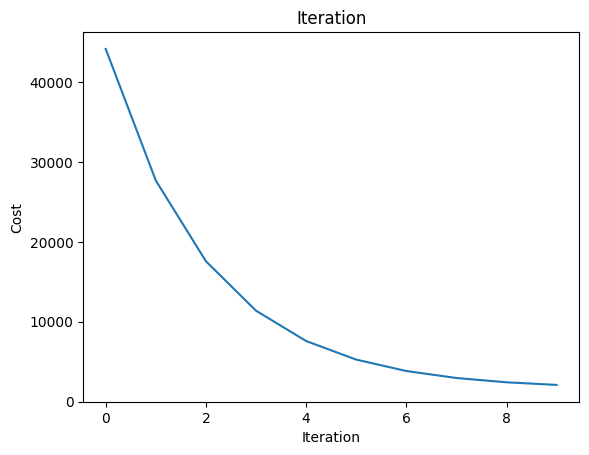

In [12]:
plot_cost_iter(hist)

#### $\alpha$ = 1e-7 and Iteration = 100

In [13]:
alpha = 1e-7

w, b, J_w_b, hist = Gradient_descent(X_train, y_train, alpha, iterations = 100)

Itertaion = 0
w = [5.5e-02, 1.0e-04, 5.2e-05, 1.2e-03]
b = 3.6e-05
J_w_b = 4.41544e+04

Itertaion = 10
w = [2.4e-01, 4.3e-04, 2.2e-04, 4.9e-03]
b = 1.6e-04
J_w_b = 1.88868e+03

Itertaion = 20
w = [2.5e-01, 4.5e-04, 2.2e-04, 4.6e-03]
b = 1.7e-04
J_w_b = 1.57091e+03

Itertaion = 30
w = [2.5e-01, 4.4e-04, 2.2e-04, 4.0e-03]
b = 1.8e-04
J_w_b = 1.56810e+03

Itertaion = 40
w = [2.5e-01, 4.4e-04, 2.1e-04, 3.4e-03]
b = 1.8e-04
J_w_b = 1.56766e+03

Itertaion = 50
w = [2.5e-01, 4.3e-04, 2.0e-04, 2.7e-03]
b = 1.9e-04
J_w_b = 1.56724e+03

Itertaion = 60
w = [2.5e-01, 4.3e-04, 1.9e-04, 2.1e-03]
b = 1.9e-04
J_w_b = 1.56681e+03

Itertaion = 70
w = [2.5e-01, 4.2e-04, 1.8e-04, 1.4e-03]
b = 2.0e-04
J_w_b = 1.56639e+03

Itertaion = 80
w = [2.5e-01, 4.1e-04, 1.8e-04, 7.7e-04]
b = 2.0e-04
J_w_b = 1.56597e+03

Itertaion = 90
w = [2.5e-01, 4.1e-04, 1.7e-04, 1.3e-04]
b = 2.1e-04
J_w_b = 1.56555e+03

Itertaion = 99
w = [2.5e-01, 4.0e-04, 1.6e-04, -4.6e-04]
b = 2.1e-04
J_w_b = 1.56517e+03



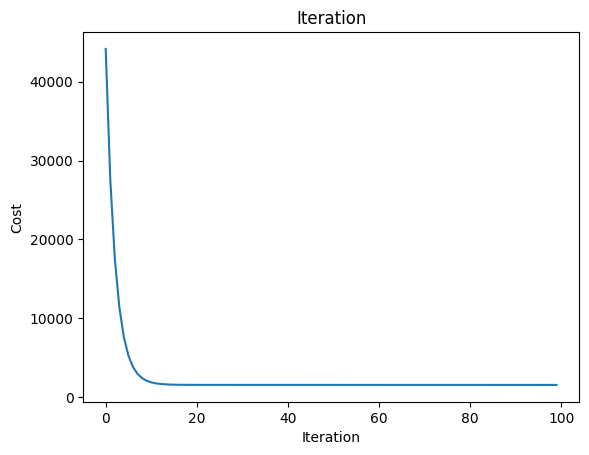

In [14]:
plot_cost_iter(hist)

<div style="text-align:center">
    <img src="b_3_convergence.png" alt="Image" width="500"/>
</div>

$$\text{J_w_b_(-2) = 1.56555e+03}$$

$$\text{J_w_b_(-1) = 1.56517e+03}$$

$$\text{|J_w_b_(-1) - J_w_b_(-2)| <= $\epsilon$  = 0.001}$$

$$\text{Therefore, it is convergence!}$$

## 4. Feature Scaling 

The lectures discussed three different techniques: 
- Feature scaling, essentially dividing each feature by a user selected value to result in a range between -1 and 1.

<div style="text-align:center">
    <img src="b_3_FS.png" alt="Image" width="500"/>
</div>

- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 

<div style="text-align:center">
    <img src="b_3_Mean.png" alt="Image" width="500"/>
</div>

- Z-score normalization which we will explore below. 

<div style="text-align:center">
    <img src="b_3_zscore.png" alt="Image" width="500"/>
</div>

### Z-Score normalization 
After z-score normalization, all features will have __a mean of 0__ and __a standard deviation of 1__.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the X matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

In [15]:
def zscore_normalize_features(X):
    
    mean = np.mean(X, axis = 0)
    
    print(mean)
    
    sigma = np.std(X, axis = 0)
    
    print(sigma)
    
    X_norm = (X - mean) / sigma
    
    return X_norm, mean, sigma

In [16]:
mu = np.mean(X_train, axis = 0)
print("mu")
print(mu)
print("")

sigma = np.std(X_train, axis = 0)
print("sigma")
print(sigma)

X_mean = X_train - mu

X_norm = X_mean / sigma

mu
Size(sqft)    1413.71
Bedrooms         2.71
Floors           1.38
Age             38.65
dtype: float64

sigma
Size(sqft)    412.172835
Bedrooms        0.652610
Floors          0.485386
Age            25.785025
dtype: float64


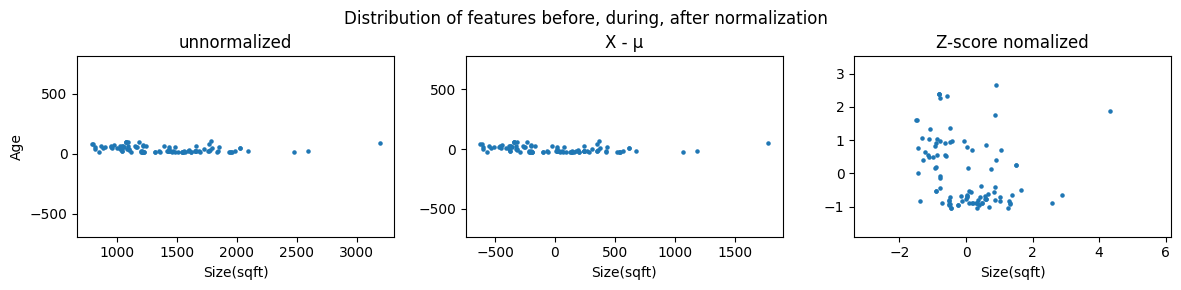

In [17]:
fig, ax = plt.subplots(1,3,figsize = (12,3))

ax[0].scatter(X_train.iloc[:,0], X_train.iloc[:,3], s = 5)
ax[0].set_xlabel(X_train.columns[0])
ax[0].set_ylabel(X_train.columns[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean.iloc[:,0], X_mean.iloc[:,3], s = 5)
ax[1].set_xlabel(X_mean.columns[0])
ax[1].set_title("X - μ")
ax[1].axis('equal')

ax[2].scatter(X_norm.iloc[:,0], X_norm.iloc[:,3], s = 5)
ax[2].set_xlabel(X_norm.columns[0])
ax[2].set_title("Z-score nomalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribution of features before, during, after normalization")
plt.show()

In [18]:
print(X_train.iloc[:,0])
print(X_train.iloc[:,3])

0      952.0
1     1244.0
2     1947.0
3     1725.0
4     1959.0
       ...  
95    1224.0
96    1432.0
97    1660.0
98    1212.0
99    1050.0
Name: Size(sqft), Length: 100, dtype: float64
0     65.0
1     64.0
2     17.0
3     42.0
4     15.0
      ... 
95    12.0
96    43.0
97    19.0
98    20.0
99    65.0
Name: Age, Length: 100, dtype: float64


The plot above shows the relationship between two of the training set parameters, "age" and "sqft". *These are plotted with equal scale*. 
- Left: Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
- Middle: The first step find removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the variance. This leaves both features centered at zero with a similar scale.

## 5. Normalization

In [19]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = \n{X_mu}, \n\nX_sigma = \n{X_sigma}")
print(f"\nPeak to Peak range by column in Raw        X:\n{np.ptp(X_train,axis=0)}")
print(f"\nPeak to Peak range by column in Normalized X:\n{np.ptp(X_norm,axis=0)}")

Size(sqft)    1413.71
Bedrooms         2.71
Floors           1.38
Age             38.65
dtype: float64
Size(sqft)    412.172835
Bedrooms        0.652610
Floors          0.485386
Age            25.785025
dtype: float64
X_mu = 
Size(sqft)    1413.71
Bedrooms         2.71
Floors           1.38
Age             38.65
dtype: float64, 

X_sigma = 
Size(sqft)    412.172835
Bedrooms        0.652610
Floors          0.485386
Age            25.785025
dtype: float64

Peak to Peak range by column in Raw        X:
[2.406e+03 4.000e+00 1.000e+00 9.500e+01]

Peak to Peak range by column in Normalized X:
[5.83735704 6.12923357 2.06021411 3.68430905]


The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

In [20]:
from scipy.stats import norm

def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    
    ax.set_xlabel(data.name)
    
    mu = np.mean(data) 
    std = np.std(data)

    dist = norm.pdf(bins, loc=mu, scale = std)
   
    axr = ax.twinx()
    axr.plot(bins, dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

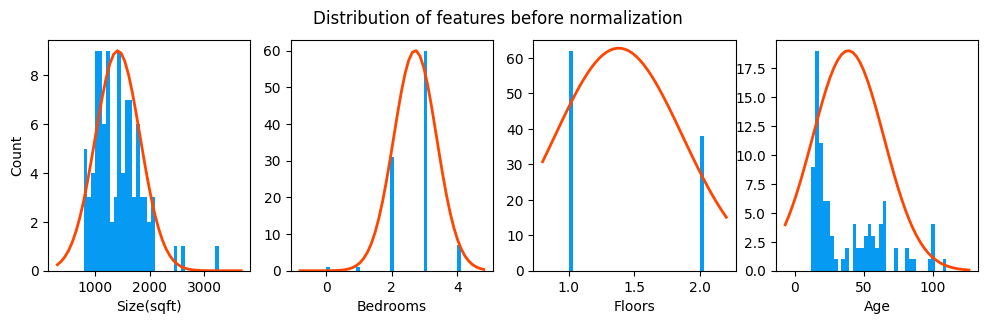

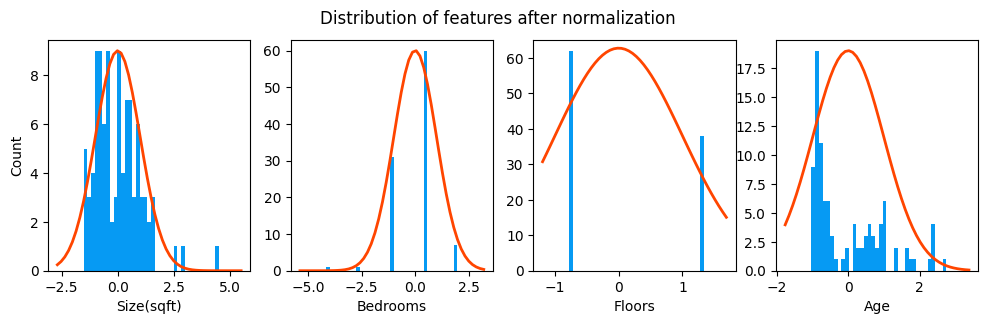

In [21]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3))

## Distribution of features before normalization
for i in range(len(ax)):
    
    norm_plot(ax[i], X_train.iloc[:, i])
    
ax[0].set_ylabel("Count")   
fig.suptitle("Distribution of features before normalization")
plt.show()

## Distribution of features after normalization
fig, ax = plt.subplots(1, 4, figsize = (12, 3))
for i in range(len(ax)):
    
    norm_plot(ax[i], X_norm.iloc[:, i])
    
ax[0].set_ylabel("Count")   
fig.suptitle("Distribution of features after normalization")
plt.show()

Notice, above, the range of the normalized data is **centered around zero and roughly +/- 1**. Most importantly, the range is similar for each feature.

Let's re-run our gradient descent algorithm with normalized data. Note the **vastly larger value of alpha**. This will speed descent.

In [22]:
w_norm, b_norm, J_w_b_norm, hist = Gradient_descent(X_norm, y_train, 
                                                    alpha = 1.0e-1, iterations = 1000)

Itertaion = 0
w = [8.9e+00, 3.0e+00, 3.3e+00, -6.0e+00]
b = 3.6e+01
J_w_b = 5.73264e+04

Itertaion = 100
w = [1.1e+02, -2.0e+01, -3.1e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.21728e+02

Itertaion = 200
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19714e+02

Itertaion = 300
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 400
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 500
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 600
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 700
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 800
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 900
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02

Itertaion = 999
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_

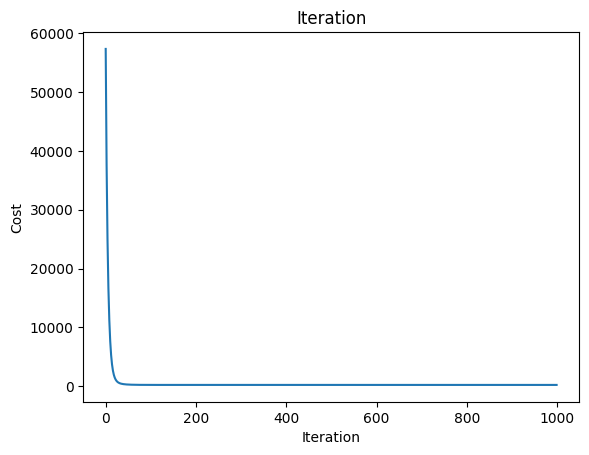

In [23]:
plot_cost_iter(hist)

**The scaled features get very accurate results much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features. Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

## 6. Predict target using normalized features

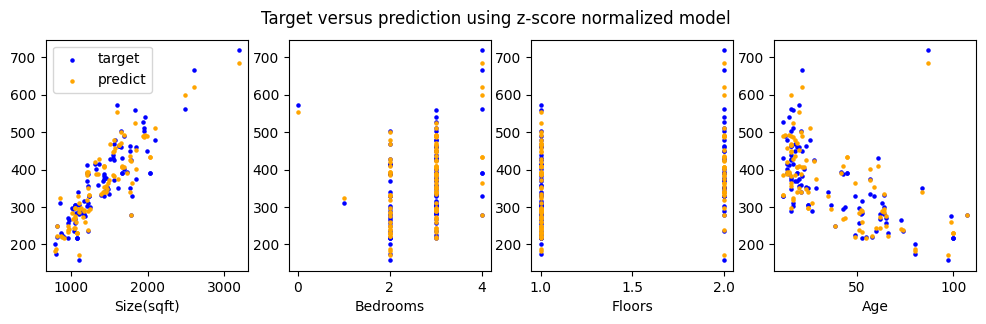

In [24]:
y_predict = np.zeros(X_norm.shape[0])

for i in range(len(y_predict)):
    
    y_predict = Prediction(X_norm, w_norm, b_norm)
    
fig, ax = plt.subplots(1, 4, figsize = (12, 3))

for i in range(len(ax)):
    
    ax[i].scatter(X_train.iloc[:,i], y_train, color = "blue", label = "target", s = 5)
    
    ax[i].set_xlabel(X_train.iloc[:,i].name)
    
    ax[i].scatter(X_train.iloc[:,i], y_predict, color = "orange", label = "predict", s = 5)
    
ax[0].set_label(y_train.name)
ax[0].legend();
fig.suptitle("Target versus prediction using z-score normalized model")
plt.show()

The results look good. A few points to note:
- with multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.

**Prediction**
The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized. 

### Error example

如果只有一条数据，zscore_normalize_features函数求得mean和sigma, 会导致求出的y是错的，所以一条数据就自己算mean，sigma...去标准化

In [25]:
X_house = np.array([1200, 3, 1, 40])
X_house_norm, mean, sigma = zscore_normalize_features(X_house)

y_house_predict = Prediction(X_house_norm, w_norm, b_norm)

print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${y_house_predict*1000:0.0f}")

311.0
513.4992697171049
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $606275


### Correct example

所以我们把大数据, X_train的mean和sigma拿过来标准化该数据。

In [26]:
X_house = np.array([1200, 3, 1, 40])
X_house_norm = (X_house - X_mu) / X_sigma
y_house_predict = Prediction(X_house_norm, w_norm, b_norm)
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${y_house_predict*1000:0.0f}")

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936


## 7. Acknowledgments

The housing data was derived from the [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) compiled by Dean De Cock for use in data science education.

# RECEFERENCE

[1]https://www.bilibili.com/video/BV1Pa411X76s?p=28&vd_source=8c32dd2bfbfecb1eaa9b0b9c4fb4d83e

[2]https://github.com/kaieye/2022-Machine-Learning-Specialization/blob/main/Supervised%20Machine%20Learning%20Regression%20and%20Classification/week2/3.Gradient%20descent%20in%20practice/C1_W2_Lab03_Feature_Scaling_and_Learning_Rate_Soln.ipynb

[3]https://www.coursera.org/specializations/machine-learning-introduction